In [1]:
import os
import shutil
import numpy as np
import scipy.ndimage as img

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import data, io, filters
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage.color import rgb2gray, rgb2hsv
from skimage.feature import hog
import skimage

random_seed = 0
path = './Data/fotos_sumatra'

In [2]:
def crop_resize(image, size=64):
    height, width, ch = image.shape
    ratio = image.shape[0]/image.shape[1] 
    if ratio > 1.0:
        ratio = 1.0/ratio
    if ratio < 0.9:
        offset = np.abs(width-height)//2
        if height < width:
            image = image[:,offset:-offset, :]
        else:
            image = image[offset:-offset, :, :]
    image = skimage.transform.resize(image, (size, size, ch))
    return image

In [3]:
X_inceptionV3 = np.load(os.path.join(path,'features_inceptionV3.npy'))
files = np.loadtxt(os.path.join(path,'images_inceptionV3.txt'), dtype=str, 
                    delimiter='\n')
images = np.stack([crop_resize(io.imread(f)) for f in files], axis=0)
y = np.array([1 if f.find('SANS') > -1 else 0 for f in files])

/mnt/Data/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [4]:
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedShuffleSplit
#skf = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=random_seed)
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=random_seed)

skf_cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, 
                                 random_state=random_seed)

In [5]:
from prototype_models import classify_cluster_softmax, classify_svm, classify_softmax

In [6]:
result = classify_cluster_softmax(X_inceptionV3, y, N=2, 
                                      skf=skf, skf_cv=skf_cv,
                                      n_Cs=8, Cs_lim=(-4,4), 
                                      n_n_clusters=8, n_clusters_lim=(2,5),
                                      models_to_test=['l1_cat', 'l2_cat'],
                                      random_state=random_seed,
                                      return_model=True)

Fitting 2 folds for each of 64 candidates, totalling 128 fits


[Parallel(n_jobs=2)]: Done 128 out of 128 | elapsed:    7.7s finished


best Params {'classify__C': 3.727593720314938, 'classify__penalty': 'l1', 'classify__shortcut': 'cat', 'classify__solver': 'saga', 'classify__tol': 0.1, 'classify__use_shortcut': True, 'cluster__class_weight': 0.0, 'cluster__n_clusters': 4}
mean acuracy of best cv model:  0.781084656084656
accuracy on test 0.9285714285714286
Fitting 2 folds for each of 64 candidates, totalling 128 fits
best Params {'classify__C': 3.727593720314938, 'classify__penalty': 'l1', 'classify__shortcut': 'cat', 'classify__solver': 'saga', 'classify__tol': 0.1, 'classify__use_shortcut': True, 'cluster__class_weight': 0.0, 'cluster__n_clusters': 4}
mean acuracy of best cv model:  0.7096560846560847
accuracy on test 0.7142857142857143
Fitting 2 folds for each of 64 candidates, totalling 128 fits


[Parallel(n_jobs=2)]: Done 128 out of 128 | elapsed:    8.0s finished


best Params {'classify__C': 3.727593720314938, 'classify__penalty': 'l1', 'classify__shortcut': 'cat', 'classify__solver': 'saga', 'classify__tol': 0.1, 'classify__use_shortcut': True, 'cluster__class_weight': 0.0, 'cluster__n_clusters': 4}
mean acuracy of best cv model:  0.7096560846560847
accuracy on test 0.7142857142857143
Fitting 2 folds for each of 64 candidates, totalling 128 fits


[Parallel(n_jobs=2)]: Done 128 out of 128 | elapsed:    8.5s finished


best Params {'classify__C': 719.6856730011514, 'classify__penalty': 'l1', 'classify__shortcut': 'cat', 'classify__solver': 'saga', 'classify__tol': 0.1, 'classify__use_shortcut': True, 'cluster__class_weight': 0.0, 'cluster__n_clusters': 4}
mean acuracy of best cv model:  0.7996031746031746
accuracy on test 0.7142857142857143
Fitting 2 folds for each of 64 candidates, totalling 128 fits


[Parallel(n_jobs=2)]: Done 128 out of 128 | elapsed:    7.6s finished
[Parallel(n_jobs=2)]: Done 128 out of 128 | elapsed:    7.8s finished


best Params {'classify__C': 3.727593720314938, 'classify__penalty': 'l1', 'classify__shortcut': 'cat', 'classify__solver': 'saga', 'classify__tol': 0.1, 'classify__use_shortcut': True, 'cluster__class_weight': 0.0, 'cluster__n_clusters': 4}
mean acuracy of best cv model:  0.7857142857142857
accuracy on test 0.8461538461538461
Fitting 2 folds for each of 64 candidates, totalling 128 fits
best Params {'classify__C': 51.79474679231202, 'classify__penalty': 'l1', 'classify__shortcut': 'cat', 'classify__solver': 'saga', 'classify__tol': 0.1, 'classify__use_shortcut': True, 'cluster__class_weight': 0.0, 'cluster__n_clusters': 4}
mean acuracy of best cv model:  0.7089947089947091
accuracy on test 0.7142857142857143
Fitting 2 folds for each of 64 candidates, totalling 128 fits


[Parallel(n_jobs=2)]: Done 128 out of 128 | elapsed:    7.7s finished
[Parallel(n_jobs=2)]: Done 128 out of 128 | elapsed:    7.5s finished


best Params {'classify__C': 3.727593720314938, 'classify__penalty': 'l1', 'classify__shortcut': 'cat', 'classify__solver': 'saga', 'classify__tol': 0.1, 'classify__use_shortcut': True, 'cluster__class_weight': 0.0, 'cluster__n_clusters': 4}
mean acuracy of best cv model:  0.7453703703703703
accuracy on test 0.7857142857142857
Fitting 2 folds for each of 64 candidates, totalling 128 fits
best Params {'classify__C': 3.727593720314938, 'classify__penalty': 'l1', 'classify__shortcut': 'cat', 'classify__solver': 'saga', 'classify__tol': 0.1, 'classify__use_shortcut': True, 'cluster__class_weight': 0.0, 'cluster__n_clusters': 4}
mean acuracy of best cv model:  0.8002645502645502
accuracy on test 0.8571428571428571
Fitting 2 folds for each of 64 candidates, totalling 128 fits


[Parallel(n_jobs=2)]: Done 128 out of 128 | elapsed:    7.6s finished
[Parallel(n_jobs=2)]: Done 128 out of 128 | elapsed:    7.3s finished


best Params {'classify__C': 51.79474679231202, 'classify__penalty': 'l1', 'classify__shortcut': 'cat', 'classify__solver': 'saga', 'classify__tol': 0.1, 'classify__use_shortcut': True, 'cluster__class_weight': 0.0, 'cluster__n_clusters': 4}
mean acuracy of best cv model:  0.7625661375661376
accuracy on test 0.7857142857142857
Fitting 2 folds for each of 64 candidates, totalling 128 fits


[Parallel(n_jobs=2)]: Done 128 out of 128 | elapsed:    6.8s finished


best Params {'classify__C': 3.727593720314938, 'classify__penalty': 'l1', 'classify__shortcut': 'cat', 'classify__solver': 'saga', 'classify__tol': 0.1, 'classify__use_shortcut': True, 'cluster__class_weight': 0.0, 'cluster__n_clusters': 4}
mean acuracy of best cv model:  0.7678571428571428
accuracy on test 0.6153846153846154
average test accuracy 0.7675824175824175 0.0867731859436806
Fitting 2 folds for each of 64 candidates, totalling 128 fits
best Params {'classify__C': 719.6856730011514, 'classify__penalty': 'l2', 'classify__shortcut': 'cat', 'classify__solver': 'lbfgs', 'classify__use_shortcut': True, 'cluster__class_weight': 0.0, 'cluster__n_clusters': 4}
mean acuracy of best cv model:  0.7632275132275133
accuracy on test 0.8571428571428571
Fitting 2 folds for each of 64 candidates, totalling 128 fits


[Parallel(n_jobs=2)]: Done 128 out of 128 | elapsed:    7.1s finished


best Params {'classify__C': 0.019306977288832496, 'classify__penalty': 'l2', 'classify__shortcut': 'cat', 'classify__solver': 'lbfgs', 'classify__use_shortcut': True, 'cluster__class_weight': 0.0, 'cluster__n_clusters': 4}
mean acuracy of best cv model:  0.7096560846560847
accuracy on test 0.7142857142857143
Fitting 2 folds for each of 64 candidates, totalling 128 fits


[Parallel(n_jobs=2)]: Done 128 out of 128 | elapsed:    8.4s finished
[Parallel(n_jobs=2)]: Done 128 out of 128 | elapsed:    7.7s finished


best Params {'classify__C': 719.6856730011514, 'classify__penalty': 'l2', 'classify__shortcut': 'cat', 'classify__solver': 'lbfgs', 'classify__use_shortcut': True, 'cluster__class_weight': 0.0, 'cluster__n_clusters': 4}
mean acuracy of best cv model:  0.7645502645502645
accuracy on test 0.7142857142857143
Fitting 2 folds for each of 64 candidates, totalling 128 fits


[Parallel(n_jobs=2)]: Done 128 out of 128 | elapsed:    7.0s finished


best Params {'classify__C': 51.79474679231202, 'classify__penalty': 'l2', 'classify__shortcut': 'cat', 'classify__solver': 'lbfgs', 'classify__use_shortcut': True, 'cluster__class_weight': 0.0, 'cluster__n_clusters': 5}
mean acuracy of best cv model:  0.7989417989417988
accuracy on test 0.5714285714285714
Fitting 2 folds for each of 64 candidates, totalling 128 fits
best Params {'classify__C': 0.019306977288832496, 'classify__penalty': 'l2', 'classify__shortcut': 'cat', 'classify__solver': 'lbfgs', 'classify__use_shortcut': True, 'cluster__class_weight': 0.0, 'cluster__n_clusters': 4}
mean acuracy of best cv model:  0.7678571428571428
accuracy on test 0.8461538461538461
Fitting 2 folds for each of 64 candidates, totalling 128 fits


[Parallel(n_jobs=2)]: Done 128 out of 128 | elapsed:    8.1s finished


best Params {'classify__C': 0.019306977288832496, 'classify__penalty': 'l2', 'classify__shortcut': 'cat', 'classify__solver': 'lbfgs', 'classify__use_shortcut': True, 'cluster__class_weight': 0.0, 'cluster__n_clusters': 4}
mean acuracy of best cv model:  0.7275132275132274
accuracy on test 0.7857142857142857
Fitting 2 folds for each of 64 candidates, totalling 128 fits


[Parallel(n_jobs=2)]: Done 128 out of 128 | elapsed:    7.9s finished


best Params {'classify__C': 0.2682695795279725, 'classify__penalty': 'l2', 'classify__shortcut': 'cat', 'classify__solver': 'lbfgs', 'classify__use_shortcut': True, 'cluster__class_weight': 0.0, 'cluster__n_clusters': 4}
mean acuracy of best cv model:  0.781084656084656
accuracy on test 0.6428571428571429
Fitting 2 folds for each of 64 candidates, totalling 128 fits


[Parallel(n_jobs=2)]: Done 128 out of 128 | elapsed:    7.9s finished


best Params {'classify__C': 0.019306977288832496, 'classify__penalty': 'l2', 'classify__shortcut': 'cat', 'classify__solver': 'lbfgs', 'classify__use_shortcut': True, 'cluster__class_weight': 0.0, 'cluster__n_clusters': 4}
mean acuracy of best cv model:  0.8002645502645502
accuracy on test 0.9285714285714286
Fitting 2 folds for each of 64 candidates, totalling 128 fits


[Parallel(n_jobs=2)]: Done 128 out of 128 | elapsed:    7.5s finished
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    5.3s
[Parallel(n_jobs=2)]: Done 128 out of 128 | elapsed:    7.9s finished


best Params {'classify__C': 0.019306977288832496, 'classify__penalty': 'l2', 'classify__shortcut': 'cat', 'classify__solver': 'lbfgs', 'classify__use_shortcut': True, 'cluster__class_weight': 0.0, 'cluster__n_clusters': 4}
mean acuracy of best cv model:  0.8174603174603174
accuracy on test 0.8571428571428571
Fitting 2 folds for each of 64 candidates, totalling 128 fits
best Params {'classify__C': 0.019306977288832496, 'classify__penalty': 'l2', 'classify__shortcut': 'cat', 'classify__solver': 'lbfgs', 'classify__use_shortcut': True, 'cluster__class_weight': 0.0, 'cluster__n_clusters': 4}
mean acuracy of best cv model:  0.75
accuracy on test 0.7692307692307693
average test accuracy 0.7686813186813186 0.10400302123745508


[Parallel(n_jobs=2)]: Done 128 out of 128 | elapsed:    8.5s finished


In [7]:
np.mean(result['l1_cat'][0]), np.std(result['l1_cat'][0])

(0.7675824175824175, 0.0867731859436806)

In [8]:
np.mean(result['l2_cat'][0]), np.std(result['l2_cat'][0])

(0.7686813186813186, 0.10400302123745508)

In [9]:
result_svm = classify_svm(X_inceptionV3, y, N=2, 
                          skf=skf, skf_cv=skf_cv,
                          n_Cs=8, 
                          random_state=random_seed,
                         return_model=True)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
accuracy on test 0.7857142857142857
Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.1s finished


accuracy on test 0.7142857142857143
Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.1s finished


accuracy on test 0.7142857142857143
Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.1s finished


accuracy on test 0.6428571428571429
Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.1s finished


accuracy on test 0.6923076923076923
Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.1s finished


accuracy on test 0.7857142857142857
Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.1s finished


accuracy on test 0.6428571428571429
Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.1s finished


accuracy on test 0.8571428571428571
Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.1s finished


accuracy on test 0.7857142857142857
Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.1s finished


accuracy on test 0.7692307692307693
average test accuracy 0.739010989010989 0.06580802972093693


[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.1s finished


In [10]:
np.mean(result_svm[0]), np.std(result_svm[0])

(0.739010989010989, 0.06580802972093693)

In [11]:
result_softmax = classify_softmax(X_inceptionV3, y, N=2, 
                          skf=skf, skf_cv=skf_cv,
                          n_Cs=8, 
                          random_state=random_seed,
                         return_model=True)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
accuracy on test 0.8571428571428571
Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.4s finished


accuracy on test 0.7142857142857143
Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.2s finished


accuracy on test 0.7142857142857143
Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.3s finished


accuracy on test 0.7142857142857143
Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.3s finished


accuracy on test 0.7692307692307693
Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.4s finished


accuracy on test 0.7857142857142857
Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.3s finished


accuracy on test 0.7142857142857143
Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.3s finished


accuracy on test 0.8571428571428571
Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.3s finished


accuracy on test 0.8571428571428571
Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.3s finished


accuracy on test 0.7692307692307693
average test accuracy 0.7752747252747252 0.059302490777283584


[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.3s finished


In [12]:
np.mean(result_softmax[0]), np.std(result_softmax[0])

(0.7752747252747252, 0.059302490777283584)

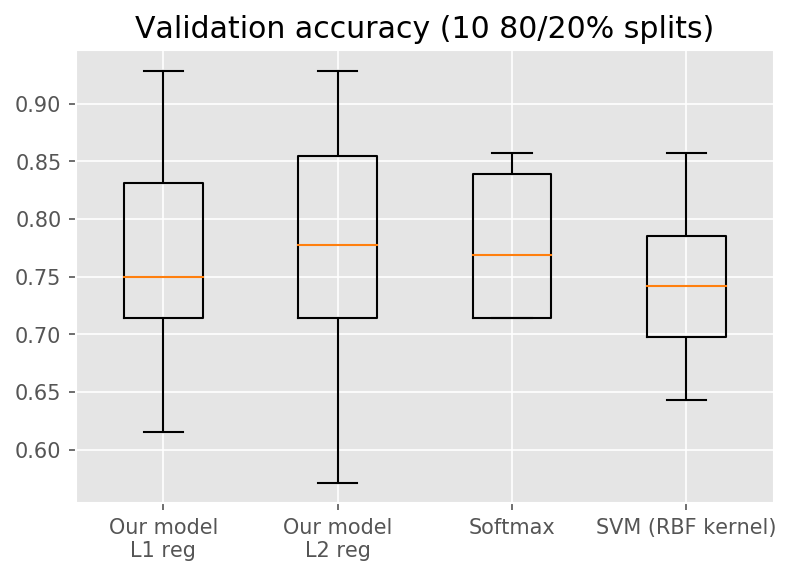

In [13]:
accs = [ result['l1_cat'][0],
         result['l2_cat'][0], 
         result_softmax[0], result_svm[0]]
names = ['Our model\nL1 reg','Our model\nL2 reg', 'Softmax', 'SVM (RBF kernel)' ]
means = [np.mean(a) for a in accs]
stds = [np.std(a) for a in accs]
with matplotlib.style.context('ggplot'):
    plt.figure(dpi=150, figsize=(6,4))
    plt.boxplot(accs)
    plt.xticks(np.arange(len(accs))+1, names)
    plt.title('Validation accuracy (10 80/20% splits)')

In [14]:
means, stds

([0.7675824175824175,
  0.7686813186813186,
  0.7752747252747252,
  0.739010989010989],
 [0.0867731859436806,
  0.10400302123745508,
  0.059302490777283584,
  0.06580802972093693])

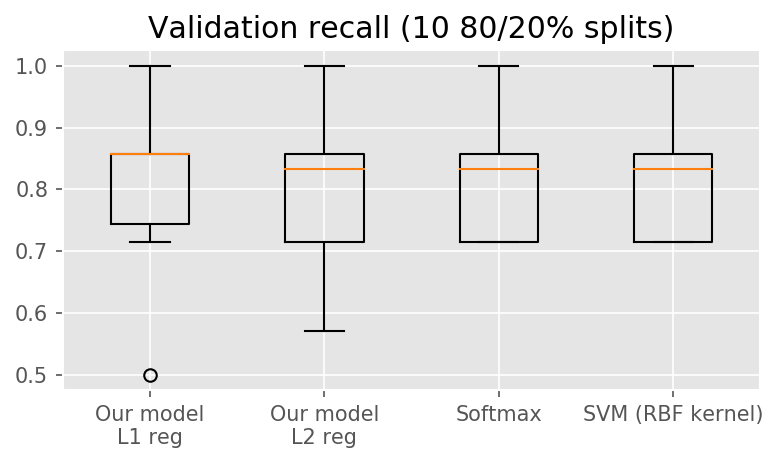

In [24]:
from sklearn.metrics import recall_score
models = [result['l1_cat'][1],
          result['l2_cat'][1], 
          result_softmax[1], 
          result_svm[1]]
recalls = []
for m in models:
    recall = []
    split = 0
    for train, test in skf.split(X_inceptionV3, y):
        model_i = m[split]
        y_pred = model_i.predict(X_inceptionV3[test])
        recall.append(recall_score(y[test], y_pred))
        split += 1
    recalls.append(recall)
with matplotlib.style.context('ggplot'):
    plt.figure(dpi=150, figsize=(6,3))
    plt.boxplot(recalls)
    plt.xticks(np.arange(len(accs))+1, names)
    plt.title('Validation recall (10 80/20% splits)')

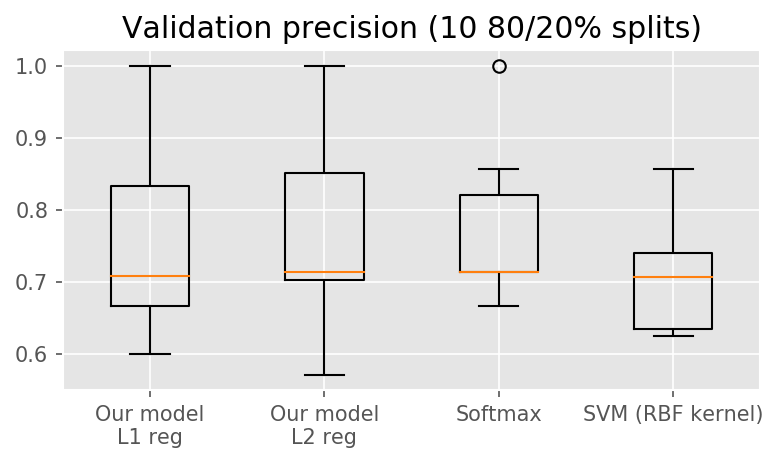

In [25]:
from sklearn.metrics import precision_score
precisions = []
for m in models:
    recall = []
    split = 0
    for train, test in skf.split(X_inceptionV3, y):
        model_i = m[split]
        y_pred = model_i.predict(X_inceptionV3[test])
        recall.append(precision_score(y[test], y_pred))
        split += 1
    precisions.append(recall)
with matplotlib.style.context('ggplot'):
    plt.figure(dpi=150, figsize=(6,3))
    plt.boxplot(precisions)
    plt.xticks(np.arange(len(accs))+1, names)
    plt.title('Validation precision (10 80/20% splits)')

In [17]:
%run prototype_plots.py

In [18]:
reportl2 = Report('analysis_comb_model', 
                result_dict = {'l2_cat': result['l2_cat'][1]},
                model='l2_cat',
                N=2, 
                splitter=skf, split=0, directory=path )

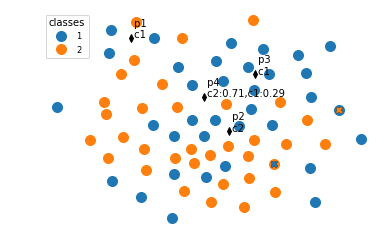

In [19]:
reportl2.plot2D(X_inceptionV3, y, method='tsne', split='both', random_state=random_seed)

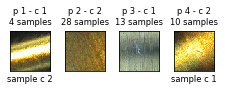

In [20]:
reportl2.closest_images(images, X_inceptionV3, y, show_distances=False)

In [21]:
reportl1 = Report('analysis_comb_model', 
                result_dict = {'l1_cat': result['l1_cat'][1]},
                model='l1_cat',
                N=2, 
                splitter=skf, split=0, directory=path )

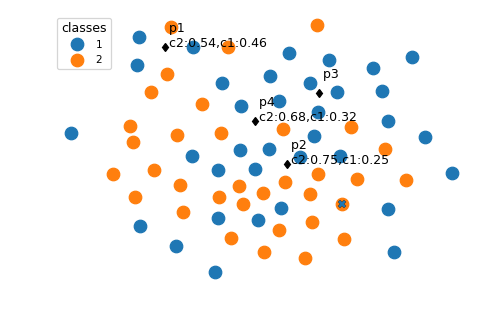

In [22]:
reportl1.plot2D(X_inceptionV3, y, method='tsne', split='both', random_state=random_seed)
plt.gcf().set_dpi(90)

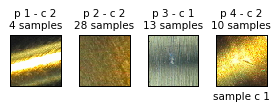

In [23]:
reportl1.closest_images(images, X_inceptionV3, y, show_distances=False)
plt.gcf().set_dpi(90)